Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


33/33 ━━━━━━━━━━━━━━━━━━━━ 10s 188ms/step - accuracy: 0.3185 - loss: 2.0212 - val_accuracy: 0.1822 - val_loss: 1.9400
Epoch 2/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 11s 216ms/step - accuracy: 0.5059 - loss: 1.4403 - val_accuracy: 0.1822 - val_loss: 1.9443
Epoch 3/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 5s 153ms/step - accuracy: 0.5716 - loss: 1.1795 - val_accuracy: 0.1822 - val_loss: 1.9820
Epoch 4/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 6s 167ms/step - accuracy: 0.6415 - loss: 1.0672 - val_accuracy: 0.1822 - val_loss: 2.0084
Epoch 5/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 10s 149ms/step - accuracy: 0.6594 - loss: 0.9934 - val_accuracy: 0.0736 - val_loss: 1.9733
Epoch 6/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 7s 203ms/step - accuracy: 0.7011 - loss: 0.8751 - val_accuracy: 0.1899 - val_loss: 1.9492
Epoch 7/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 5s 146ms/step - accuracy: 0.7382 - loss: 0.7923 - val_accuracy: 0.2016 - val_loss: 1.9601
Epoch 8/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 6s 168ms/step - accuracy: 0.7209 - loss: 0.8088 - val_accuracy: 0.1822 - v

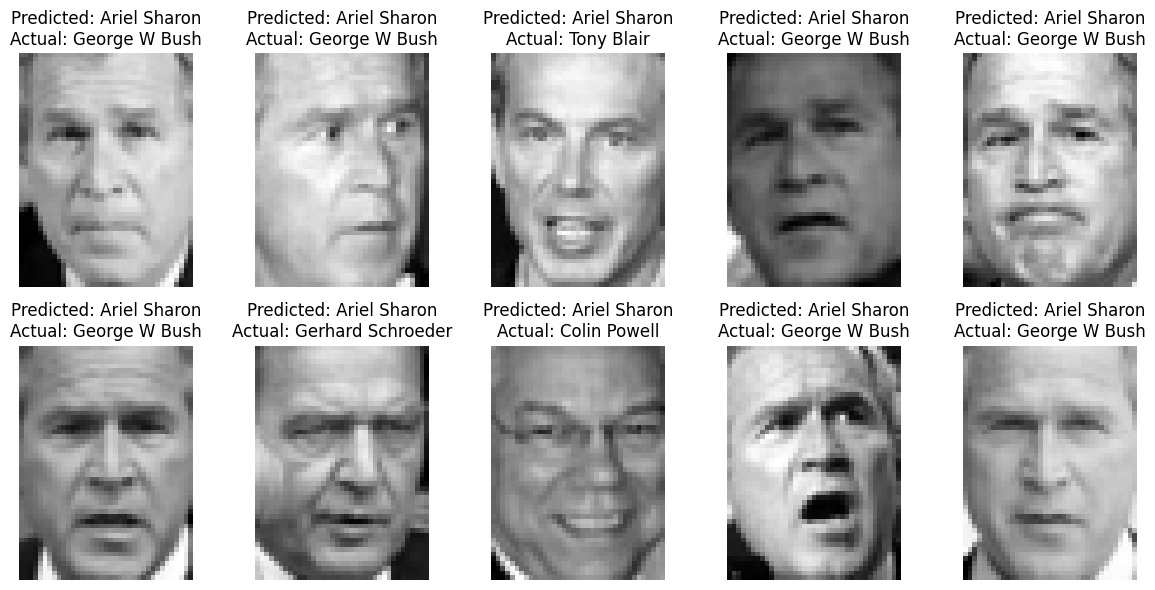

In [ ]:
import numpy as np
import tensorflow as tf

from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.datasets import fetch_lfw_people
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

import matplotlib.pyplot as plt

# Load LFW dataset
lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)

# Get the data and labels
X = lfw_people.images
y = lfw_people.target
target_names = lfw_people.target_names

# Preprocess images (reshape and normalize)
X = np.expand_dims(X, axis=-1)  # Adding channel dimension (grayscale)
X = X / 255.0  # Normalization

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Encode the labels
encoder = LabelEncoder()
y_train = encoder.fit_transform(y_train)
y_test = encoder.transform(y_test)

# Data Augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)
datagen.fit(X_train)

# Build a CNN model with more layers and adjustments
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(X.shape[1], X.shape[2], 1)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    # Removed the extra MaxPooling2D and Conv2D layers to avoid negative dimensions
    # layers.MaxPooling2D((2, 2)),
    # layers.Conv2D(256, (3, 3), activation='relu'),
    # layers.BatchNormalization(),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),  # Increased neurons in Dense layer
    layers.Dropout(0.5),
    layers.Dense(len(target_names), activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model with data augmentation and more epochs
model.fit(datagen.flow(X_train, y_train, batch_size=32), epochs=50, validation_data=(X_test, y_test)) # Increased epochs

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_acc * 100:.2f}%')
# Get predictions for the test set
y_pred = model.predict(X_test)
y_pred_labels = np.argmax(y_pred, axis=1)
# Display some images with predictions
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(12, 6))
for i, ax in enumerate(axes.flat):
    ax.imshow(X_test[i].reshape(50, 37), cmap='gray')
    ax.set_title(f"Predicted: {target_names[y_pred_labels[i]]}\nActual: {target_names[y_test[i]]}")
    ax.axis('off')
plt.tight_layout()
plt.show()